In [1]:
disp('PASSENGER CARS SOLD') 
pkg load io
cars = csvread( % MIRAR TRUCKS EN VEZ DE COCHES 
"C:/Users/dishi/OneDrive/Desktop/TFG/carsdata.csv");
cars=cars(122:573,3); % column 3 = monthly data, sampled from 1 Jan 1970 to 31 August (8) 2007
size(cars) % dimension to later construct time vector!!

disp('NEW PRIVATE HOUSING UNITS STARTED')
house=csvread(
"C:/Users/dishi/OneDrive/Desktop/TFG/housedata.csv");
house=house(134:585,3); % column 3 = monthly data, sampled from 1 Jan 1970 to 31 August (8) 2007
size(house)

disp('ALL EMPLOYEES, CONSTRUCTION')
conworker=csvread(
"C:/Users/dishi/OneDrive/Desktop/TFG/conworker.csv");
conworker=conworker(374:825,3); % column 3 = monthly data, sampled from 1 Jan 1970 to 31 August (8) 2007
size(conworker)

disp('MANUFACTURERS NEW ORDERS')
manorder=csvread(
"C:/Users/dishi/OneDrive/Desktop/TFG/manorder.csv");
manorder=manorder(2:188,3); % column 3 = monthly data, sampled from 1 Feb 1992 to 31 August (8) 2007, no data for 1970s
size(manorder)

PASSENGER CARS SOLD
ans =

   452     1

NEW PRIVATE HOUSING UNITS STARTED
ans =

   452     1

ALL EMPLOYEES, CONSTRUCTION
ans =

   452     1

MANUFACTURERS NEW ORDERS
ans =

   187     1



In [2]:
disp('TREND WITH LDHR METHOD')
e4init % loading the E4 toolbox 
pkg load control
addpath('C:\Program Files\PracticasLDHR-main\OctMat')
savepath
addpath('C:\Program Files\PracticasLDHR-main\spcline')
savepath

TREND WITH LDHR METHOD

                      EEEEEEEEE   444  444
                     EEEEEEEEEEE  444  444
                     EEE          44444444
                     EEE           4444444
                     EEEEEEE           444
                     EEEEEEE           444
                     EEE
                     EEE
                     EEEEEEEEEE
                      EEEEEEEE

Toolbox for State Space Estimation of Econometric Models
                   Version  JAN-2012

Web: www.ucm.es/info/icae/e4
    sete4opt at line 36 column 44
    e4init at line 48 column 1

 
*********************** Options set by user ********************
Filter. . . . . . . . . . . . . : KALMAN
Scaled B and M matrices . . . . : NO
Initial state vector. . . . . . : AUTOMATIC SELECTION
Initial covariance of state v.  : IDEJONG
Variance or Cholesky factor? .  : VARIANCE
Optimization algorithm. . . . . : BFGS
Maximum step length . . . . . . : 0.100000
Stop tolerance. . . . . . . . . : 0.000010
Max. 

In [3]:
disp('CODE TO UNDERSTAND') 
PaP=12./(0:6) % vector con periodos correspondientes a la estacionalidad para datos mensuales. 
TVPaP=[1 1 1 1 1 1 0;1 0 0 0 0 0 0] 
% using 'house' as the data for new houses built 
[VAR,P,TVP,oar]=autodhr(house,12,[],[],PaP,TVPaP)

CODE TO UNDERSTAND
PaP =

       Inf   12.0000    6.0000    4.0000    3.0000    2.4000    2.0000

TVPaP =

   1   1   1   1   1   1   0
   1   0   0   0   0   0   0

    dhr2thd at line 36 column 10
    dhr2rf at line 32 column 40
    autodhr at line 342 column 31

    dhr2thd at line 36 column 10
    dhr2rf at line 32 column 40
    autodhr at line 342 column 31

    dhr2thd at line 36 column 10
    dhr2rf at line 32 column 40
    autodhr at line 342 column 31

    e4strmat at line 12 column 13
    arma2thd at line 68 column 7
    dhr2thd at line 36 column 10
    dhr2rf at line 32 column 40
    autodhr at line 342 column 31

    e4strmat at line 12 column 13
    e4vec at line 54 column 17
    arma2thd at line 79 column 26
    dhr2thd at line 36 column 10
    dhr2rf at line 32 column 40
    autodhr at line 342 column 31

    e4strmat at line 12 column 13
    arma2thd at line 81 column 35
    dhr2thd at line 36 column 10
    dhr2rf at line 32 column 40
    autodhr at line 342 column 31



In [4]:
disp('CODE TO UNDERSTAND')
NVR=VAR(2:8)./VAR(1) % calculation of variance ratios 
filt=0;
[trend,season,cycle,irreg]=dhrfilt(house,P,TVP,VAR,12,filt,0);

CODE TO UNDERSTAND
NVR =

   0.012853   0.013081   0.006151   0.034140          0   0.001064          0

    e4strmat at line 12 column 13
    arma2thd at line 68 column 7
    dhr2thd at line 36 column 10
    dhrfilt at line 66 column 11

    e4strmat at line 12 column 13
    e4vec at line 54 column 17
    arma2thd at line 79 column 26
    dhr2thd at line 36 column 10
    dhrfilt at line 66 column 11

    e4strmat at line 12 column 13
    arma2thd at line 81 column 35
    dhr2thd at line 36 column 10
    dhrfilt at line 66 column 11

    e4strmat at line 12 column 13
    arma2thd at line 68 column 7
    dhr2thd at line 43 column 15
    dhrfilt at line 66 column 11

    e4strmat at line 12 column 13
    e4vec at line 54 column 17
    arma2thd at line 79 column 26
    dhr2thd at line 43 column 15
    dhrfilt at line 66 column 11

    e4strmat at line 12 column 13
    e4vec at line 54 column 17
    arma2thd at line 79 column 26
    dhr2thd at line 43 column 15
    dhrfilt at line 66 colum

Plotting trend with LDHR method


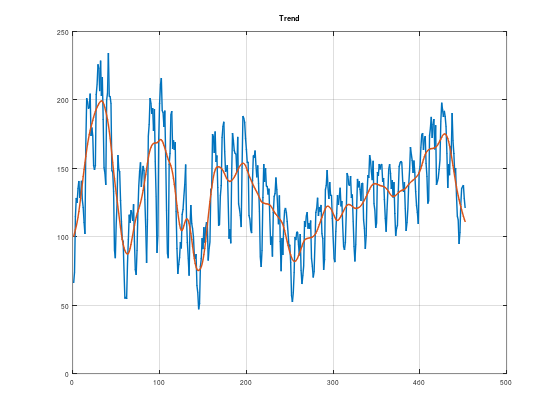

In [7]:
disp('Plotting trend with LDHR method')
trend=trend(:,1); % the first column of trend is the trend vector
plot([house,trend],'linewidth',1.4)
grid on
title('Trend')

DIFFERENCED TREND WITH LDHR


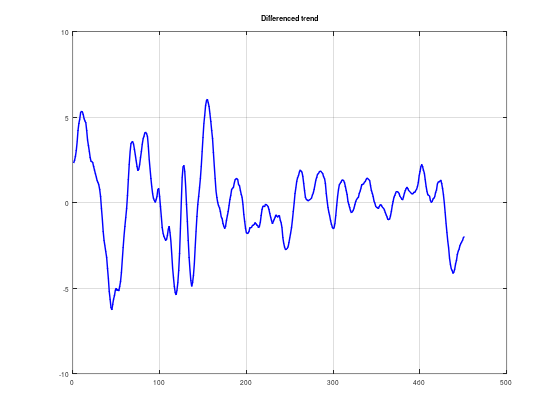

In [10]:
disp('DIFFERENCED TREND WITH LDHR')
dtrend=diff(trend);
plot(dtrend,'b','linewidth',1.4)
grid on
title('Differenced trend')

PLOTTING MONTHLY CARS
window_c = 31


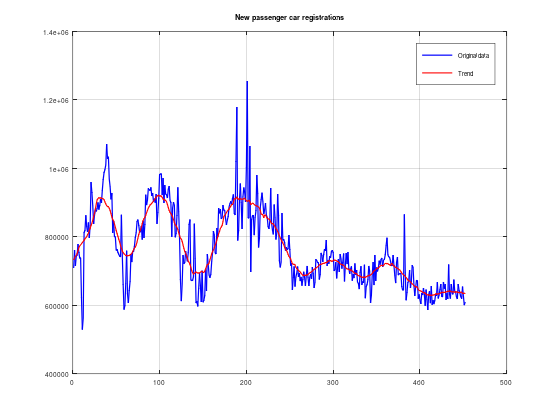

In [15]:
disp('PLOTTING MONTHLY CARS')
title('New passenger car registrations') % time series, not modified, plotted
pkg load control % toolbox de control
window_c=31 % window of 2.5 years (30 months)
plot(cars,'b','linewidth',1.2)
trendcars=movmean(cars,window_c); % trend for monthly cars
% M = movmean(A,k) returns an array of local k-point mean values, 
% where each mean is calculated over a sliding window of length k across neighboring elements of A. 
% When k is odd, the window is centered about the element in the current position. 
% The window size is automatically truncated at the endpoints when there are not enough elements to fill the window.
% When the window is truncated, the average is taken over only the elements that fill the window. M is the same size as A.
hold on;
plot(trendcars,'r','linewidth',1.1) % plotting data trend
hold off;
grid on;
title('New passenger car registrations')
legend('Original data','Trend')

PLOTTING MONTHLY HOUSES
window_h = 61


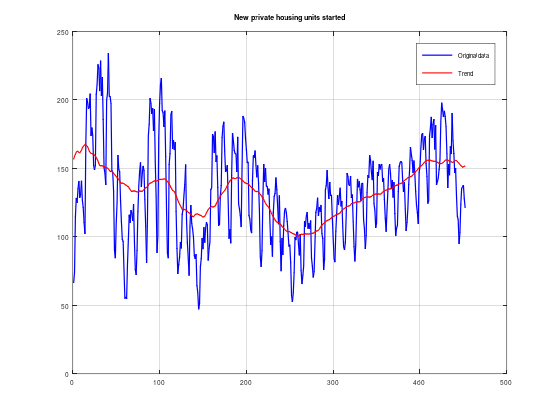

In [3]:
disp('PLOTTING MONTHLY HOUSES')
window_h=61
trendhouse=movmean(house,window_h); % trend for housing data
plot(house,'b','linewidth',1.2)
hold on
plot(trendhouse,'r','linewidth',1.1)
hold off
grid on
title('New private housing units started') % time series, not modified, plotted
legend('Original data','Trend')

PLOTTING EMPLOYEES, CONSTRUCTION
window_w = 31


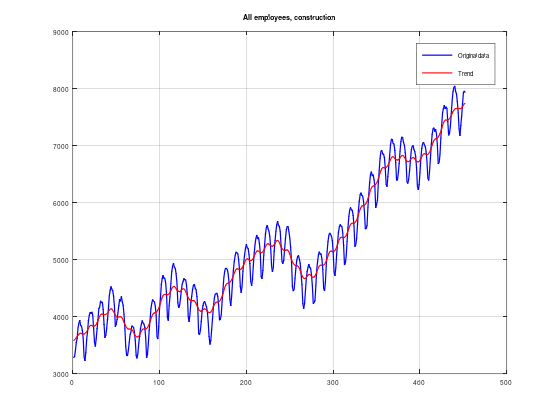

In [4]:
disp('PLOTTING EMPLOYEES, CONSTRUCTION') % notice - no heteroscedasticity 
window_w=31
trendworker=movmean(conworker,window_w);
plot(conworker,'b','linewidth',1.2)
hold on
plot(trendworker,'r','linewidth',1.1)
hold off
grid on
title('All employees, construction')
legend('Original data','Trend')

PLOTTING NEW MANUFACTURING ORDERS
window_m = 31


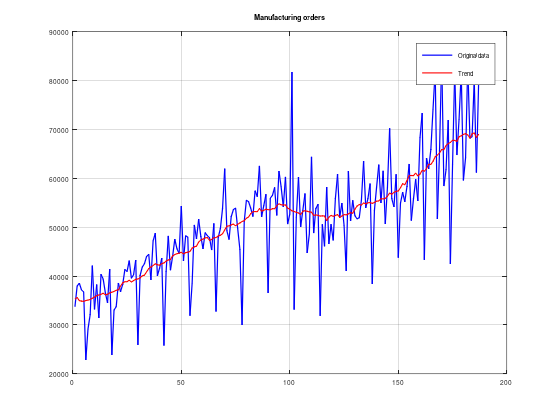

In [5]:
disp('PLOTTING NEW MANUFACTURING ORDERS')
window_m=31
trendmanorder=movmean(manorder,window_m);
plot(manorder,'b','linewidth',1.2)
hold on
plot(trendmanorder,'r','linewidth',1.1)
hold off
grid on
title('Manufacturing orders')
legend('Original data','Trend')

DIFFERENCED TREND
rows = 452
cols = 1
dtrendrow = 451
dtrendcol = 1


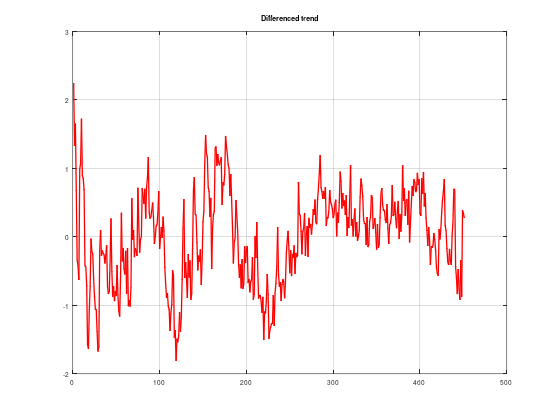

In [6]:
disp('DIFFERENCED TREND')
% DATA AVALIABLE: trendcars, trendhouse, trendworker, trendmanorder


trend=trendhouse; % TREND = DATA AVALIABLE TO PLOT DIFFERENCED AND SMOOTHED TREND


[rows,cols]=size(trend) % size of trend vector, NUMBER OF ROWS NEEDED FOR TIME VECTOR !!!

dtrend=diff(trend); % differenced trend is one observation smaller (the first one is gone)
[dtrendrow,dtrendcol]=size(dtrend) % size of differenced trend
xvalues=[1:dtrendrow]; % a vector of x-values, needed for plotting
plot(xvalues,dtrend,'r','linewidth',1.3)
grid on
title('Differenced trend');

TREND SMOOTHING DUE TO EXCESSIVE NOISE
ventana1 = 11
ventana2 = 21


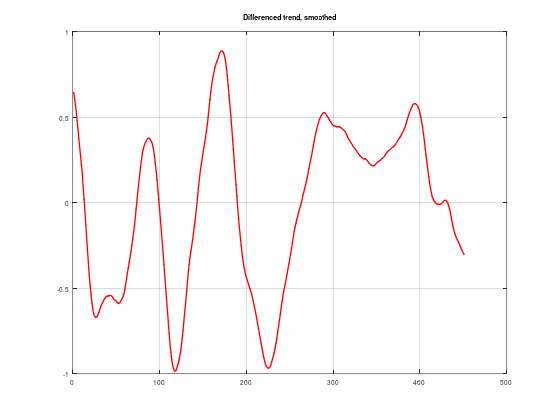

In [7]:
disp('TREND SMOOTHING DUE TO EXCESSIVE NOISE') 
ventana1=11
pkg load control
sm_dtrend=movmean(dtrend,ventana1); % smoothing the differenced trend, but still lots of noise = bad for local maxima finder
ventana2=21
sm_dtrend=movmean(sm_dtrend,ventana2); % smoothing the smoothed diff trend again to get rid of the noise
plot(sm_dtrend,'r','linewidth',1.3)
grid on
hold on
title('Differenced trend, smoothed')

FINDING LOCAL MAXIMA


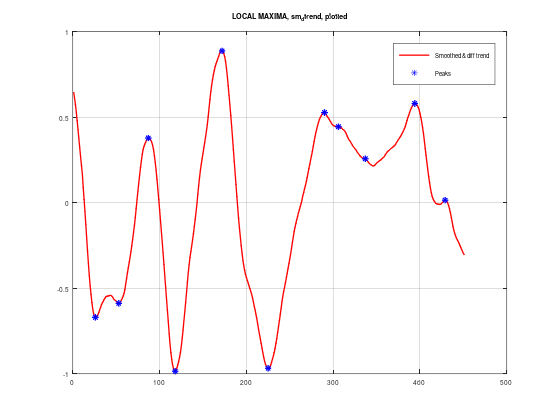

In [8]:
disp('FINDING LOCAL MAXIMA')
pkg load signal % signal package for findpeaks function 
[peaks,locations]=findpeaks(sm_dtrend,'DoubleSided'); 
% findpeaks(data) devuelve un vector con los máximos locales (picos) 
% del vector de la señal de entrada, data. Un pico local es una muestra de datos que es mayor 
% que sus dos muestras vecinas o es igual a Inf. Los picos se muestran por orden de aparición.
% Se excluyen los puntos finales de señal que no sean Inf. Si un pico es plano, la función devuelve solo el punto con el índice más bajo.
plot(sm_dtrend,'r','linewidth',1.3) % smoothed and differenced trend plotted
hold on;
plot(locations,peaks,'linewidth',1.3,'b*');
hold off;
legend('Smoothed & diff trend','Peaks')
title('LOCAL MAXIMA, sm_dtrend, plotted')
grid on

In [47]:
disp('CHECKING LOCAL MAXIMA')
peaks; % all local maxima and minima
locations; % their corresponding indices in sm_dtrend (smoothed and differenced trend)
peak1=sm_dtrend(locations(1)) % checking correct indexing: the returned value shoudl be the first local optima for sm_dtrend

CHECKING LOCAL MAXIMA
peak1 = -0.6698


In [9]:
disp('LOCATING RECESSION WARNINGS')
poslocations=locations(peaks>0); % locations of local maxima within the sm_dtrend vector 
pospeaks=peaks(peaks>0); % local maxima, or anitipation of recession (cambios de rumbo)

LOCATING RECESSION WARNINGS


In [10]:
disp('TOOLBOX CONFIGURATION') % NO HACE FALTA EJECUTAR ESTO
addpath('C:/Program Files/E4withSubspaces')
savepath
addpath('C:\Program Files\E4Matlab')
savepath
addpath('C:\Program Files\PracticasLDHR-main')
savepath
addpath('C:\Program Files\PracticasLDHR-main\functions')
savepath

TOOLBOX CONFIGURATION


In [17]:
disp('CREATING TIME VECTOR')
time=timefmt4(12,1970,1,rows); % last input = number of rows of vectors of cars, houses and conworkers, can index with (obs,:)
time(1,:)
time=time(3:end,:); % without the first row called 'obs' and the 2nd row because we took first difference 
dates_vector_size=size(time)
smoothed_diff_trend_size=size(sm_dtrend) % trendcars has the same indices as cars

anticipation=time(poslocations,:) % dates when the local maxima occured

CREATING TIME VECTOR
ans = obs         
dates_vector_size =

   451    12

smoothed_diff_trend_size =

   451     1

anticipation =

1977-04-01  
1984-05-01  
1994-03-01  
1995-07-01  
1998-02-01  
2002-11-01  
2005-10-01  



In [12]:
disp('CONFIRMATION OF A RECESSION')
window = 6; % window size for consecutive negative values
confirmed = []; % array to store the indices of confirmation of a recession

% Loop through the elements of sm_dtrend
for i = 2:(length(sm_dtrend) - window + 1) % starts at 2'nd element to see if the first one >< 0
    if all(sm_dtrend(i:i+window-1) < 0) && sm_dtrend(i-1) > 0 
        confirmed = [confirmed, i + window - 1]; % if the condition is met, store the index of the 6th negative element
    end
end

disp('Indices of the 6th negative element of sm_dtrend preceded by a positive value:');
confirmed=confirmed' % to column vector from row vector 
size(sm_dtrend); % the vector we are using
size(time); % checking time vector size
sm_dtrend; % n confirmations of recessions, see last graph 
recession=time(confirmed,:)

CONFIRMATION OF A RECESSION
Indices of the 6th negative element of sm_dtrend preceded by a positive value:
confirmed =

    19
   105
   195
   423
   437

recession =

1971-08-01  
1978-10-01  
1986-04-01  
2005-04-01  
2006-06-01  



ANTICIPATION AND CONFIRMATION OF RECESSION - ESTA MAL POR AHORA
anticipation =

1977-04-01  
1984-05-01  
1994-03-01  
1995-07-01  
1998-02-01  
2002-11-01  
2005-10-01  

recession =

1971-08-01  
1978-10-01  
1986-04-01  
2005-04-01  
2006-06-01  



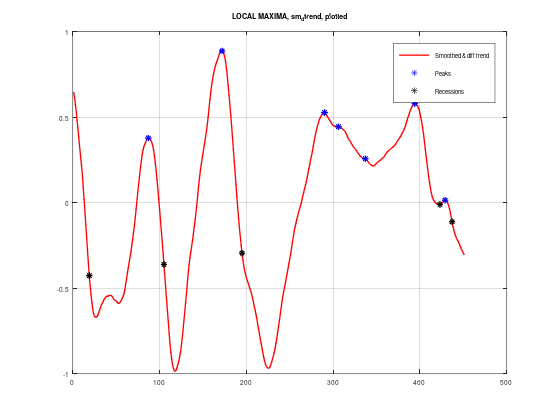

In [14]:
disp('ANTICIPATION AND CONFIRMATION OF RECESSION - ESTA MAL POR AHORA')
anticipation
recession
sm_dtrend(confirmed); % VALUES FOR RECESSION
plot(sm_dtrend,'r','linewidth',1.3); % smoothed and differenced trend plotted
hold on;
plot(poslocations,pospeaks,'linewidth',1.3,'b*'); % HERE, PLOT LOCAL MAXIMA IN A DIFFERENT COLOR TO LOCAL MINIMA 
plot(confirmed,sm_dtrend(confirmed),'linewidth',1.3,'k*');
hold off;
legend('Smoothed & diff trend','Peaks','Recessions');
title('LOCAL MAXIMA, sm_dtrend, plotted');
grid on